In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy import stats

In [2]:
# import data from CSV file and drop any rows with incomplete data and standardize author order entries
all_data = pd.read_csv('../data/FWCI_publications_raw_data.csv')
all_data = all_data.replace(0, np.nan)
all_data = all_data.dropna()
all_data['Author Order'] = all_data['Author Order'].replace({'First':'First_Last', 'Last':'First_Last'})

# drop all rows with zeroes
# all_data = all_data.loc[(all_data!=0.0).any(axis=1)]

# uncomment if you'd like to print the data
# all_data

# save cleaned dataframe
# all_data.to_csv('../data/pubs_cleaned.csv', sep=',')

In [3]:
# phase dataframe into male and female entries 
female = all_data[all_data['Identifier'].str.contains("F")]
male = all_data[all_data['Identifier'].str.contains("M")]

# phase dataframe into FWCI only 
female_FWCI = female[['Field-weighted citation impact']]
male_FWCI = male[['Field-weighted citation impact']]

# save these to CSV files 
# female_FWCI.to_csv('female_FWCI.csv', sep=',')
# male_FWCI.to_csv('male_FWCI.csv', sep=',')

/Users/katbraun/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning: 
Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warn_deprecated("2.2", "Passing one of 'on', 'true', 'off', 'false' as a "


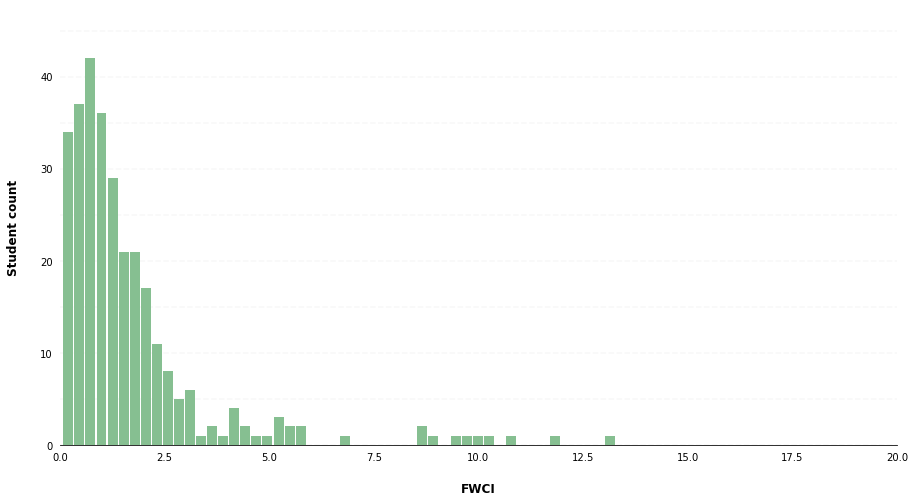

In [4]:
# check to see whether the FWCI are normally distributed 

ax = female_FWCI.hist(column='Field-weighted citation impact', bins=50, grid=False, figsize=(15,8), color='#86bf91', zorder=2, rwidth=0.9)

ax = ax[0]
for x in ax:
    
    # Specify x axis range
    x.set_xlim([0,20])

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("")

    # Set x-axis label
    x.set_xlabel("FWCI", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("Student count", labelpad=20, weight='bold', size=12)

    # save to PDF 
#     plt.savefig("../figures/female-FWCI-distribution.pdf", bbox_inches='tight')
    
    #

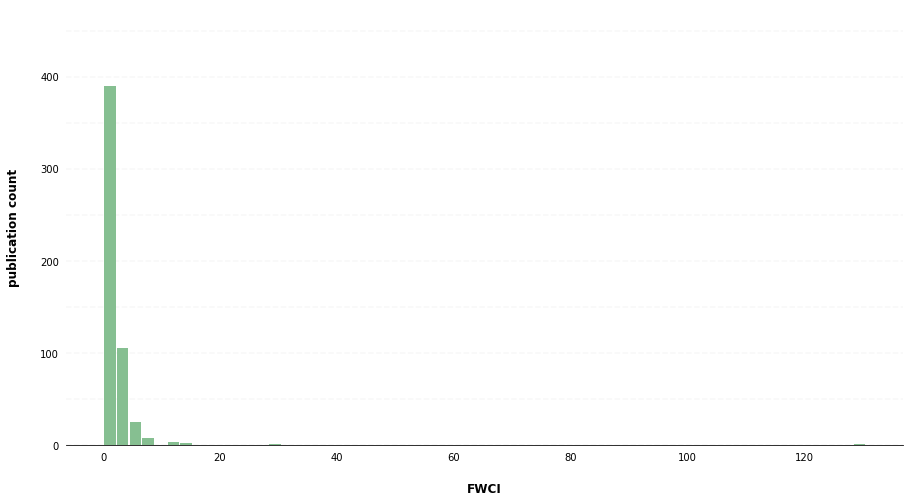

In [5]:
# check to see whether the FWCI are normally distributed 

ax = male_FWCI.hist(column='Field-weighted citation impact', bins=60, grid=False, figsize=(15,8), color='#86bf91', zorder=2, rwidth=0.9)

ax = ax[0]
for x in ax:

    # Despine
    x.spines['right'].set_visible(False)
    x.spines['top'].set_visible(False)
    x.spines['left'].set_visible(False)

    # Switch off ticks
    x.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

    # Draw horizontal axis lines
    vals = x.get_yticks()
    for tick in vals:
        x.axhline(y=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

    # Remove title
    x.set_title("")

    # Set x-axis label
    x.set_xlabel("FWCI", labelpad=20, weight='bold', size=12)

    # Set y-axis label
    x.set_ylabel("publication count", labelpad=20, weight='bold', size=12)

    # save to PDF 
#     plt.savefig("../figures/male-FWCI-distribution.pdf", bbox_inches='tight')
    
    #

In [6]:
# check for equality of variances (Welch's t test)

# first value in the tuple is the W test statistic and the second value is the p-value 
# I think both of these violate assumption of normality, so I should stop here, but I'll proceed for learning purposes
stats.shapiro(male_FWCI['Field-weighted citation impact'])
stats.shapiro(female_FWCI['Field-weighted citation impact'])

# Conduct a Welch's t-test
# If the p-value is significant, then we can reject the null hypothesis in support of the alternative (variances are equal)
stats.ttest_ind(male_FWCI['Field-weighted citation impact'], female_FWCI['Field-weighted citation impact'], equal_var = False)

# Degrees of freedom 
def welch_dof(x,y):
        dof = (x.var()/x.size + y.var()/y.size)**2 / ((x.var()/x.size)**2 / (x.size-1) + (y.var()/y.size)**2 / (y.size-1))
        print(f"Welch-Satterthwaite Degrees of Freedom= {dof:.4f}")
        
# welch_dof(female_FWCI['Field-weighted citation impact'], male_FWCI['Field-weighted citation impact'])

# Put the function together 
def welch_ttest(x, y): 
    ## Welch-Satterthwaite Degrees of Freedom ##
    dof = (x.var()/x.size + y.var()/y.size)**2 / ((x.var()/x.size)**2 / (x.size-1) + (y.var()/y.size)**2 / (y.size-1))
   
    t, p = stats.ttest_ind(x, y, equal_var = False)
    
    print("\n",
          f"Welch's t-test= {t:.4f}", "\n",
          f"p-value = {p:.4f}", "\n",
          f"Welch-Satterthwaite Degrees of Freedom= {dof:.4f}")

welch_ttest(female_FWCI['Field-weighted citation impact'], male_FWCI['Field-weighted citation impact'])


 Welch's t-test= -1.4448 
 p-value = 0.1489 
 Welch-Satterthwaite Degrees of Freedom= 714.1796


In [7]:
# phase male and female dataframes into first/last and other 
female_first = female[female['Author Order'].str.contains("First")]
female_other = female[female['Author Order'].str.contains("Other")]
male_first = male[male['Author Order'].str.contains("First")]
male_other = male[male['Author Order'].str.contains("Other")]

# save all of these dataframes to CSV files
# female_first.to_csv('../data/female_first_authors.csv', sep=',')
# female_other.to_csv('../data/female_middle_authors.csv', sep=',')
# male_first.to_csv('../data/male_first_authors.csv', sep=',')
# male_other.to_csv('../data/male_middle_authors.csv', sep=',')

# uncomment to print these dataframes
# female_first
# female_other
# male_first
# male_other

In [8]:
# generate and print some averages and std deviation of the entire population

female_citations_avg = female_first['# of citations'].mean()
female_impact_avg = female_first['Field-weighted citation impact'].mean()
female_citations_std = female_first['# of citations'].std()
female_impact_std = female_first['Field-weighted citation impact'].std()

male_citations_avg = male_first['# of citations'].mean()
male_impact_avg = male_first['Field-weighted citation impact'].mean()
male_citations_std = male_first['# of citations'].std()
male_impact_std = male_first['Field-weighted citation impact'].std()

female_citations_other_avg = female_other['# of citations'].mean()
female_impact_other_avg = female_other['Field-weighted citation impact'].mean()
female_citations_other_std = female_other['# of citations'].std()
female_impact_other_std = female_other['Field-weighted citation impact'].std()

male_citations_other_avg = male_other['# of citations'].mean()
male_impact_other_avg = male_other['Field-weighted citation impact'].mean()
male_citations_other_std = male_other['# of citations'].std()
male_impact_other_std = male_other['Field-weighted citation impact'].std()

print('The number of citations per female first or last author papers is :', female_first['# of citations'].mean(), ' +/- ', female_first['# of citations'].std())
print('Field-weighted citation impact score for female first or last author papers is :', female_first['Field-weighted citation impact'].mean(), ' +/- ', female_first['Field-weighted citation impact'].std())

print('\n')

print('The number of citations per male first or last author papers is :', male_first['# of citations'].mean(), ' +/- ', male_first['# of citations'].std())
print('Field-weighted citation impact score for male first or last author papers is :', male_first['Field-weighted citation impact'].mean(), ' +/- ', male_first['Field-weighted citation impact'].std())

print('\n')

print('The number of citations per female middle-author papers is :', female_other['# of citations'].mean(), ' +/- ', female_other['# of citations'].std())
print('Field-weighted citation impact score for female middle-author papers is :', female_other['Field-weighted citation impact'].mean(), ' +/- ', female_other['Field-weighted citation impact'].std())

print('\n')

print('The number of citations per male middle-author papers is :', male_other['# of citations'].mean(), ' +/- ', male_other['# of citations'].std())
print('Field-weighted citation impact score for male middle-author papers is :', male_other['Field-weighted citation impact'].mean(), ' +/- ', male_other['Field-weighted citation impact'].std())


##

The number of citations per female first or last author papers is : 30.192857142857143  +/-  42.0153956757805
Field-weighted citation impact score for female first or last author papers is : 1.5203571428571425  +/-  1.826953831706216


The number of citations per male first or last author papers is : 39.19844357976654  +/-  50.70267495476046
Field-weighted citation impact score for male first or last author papers is : 1.8187937743190654  +/-  2.4575293472227524


The number of citations per female middle-author papers is : 31.044585987261147  +/-  50.91563458801796
Field-weighted citation impact score for female middle-author papers is : 1.863694267515924  +/-  2.092045768063418


The number of citations per male middle-author papers is : 51.36101083032491  +/-  100.46936765330854
Field-weighted citation impact score for male middle-author papers is : 2.3796028880866436  +/-  7.928727728485527


Text(0.5, 1.0, '# of citations per first or last author papers')

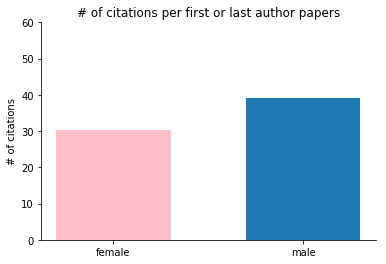

In [10]:
# number of citations per first author paper

mpl.rcParams['axes.spines.left'] = True
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.bottom'] = True

averages = ('female', 'male')
height = [female_citations_avg, male_citations_avg]
y_pos = np.arange(len(averages))

barlist = plt.bar(y_pos, height, align='center', alpha=1.0, width=0.6)
barlist[0].set_color('pink')
plt.ylim([0,60])
plt.xticks(y_pos, averages)
plt.ylabel('# of citations')
plt.title('# of citations per first or last author papers')

# plt.savefig("../figures/first-author-citations.pdf", bbox_inches='tight')

Text(0.5, 1.0, '# of citations per middle author papers')

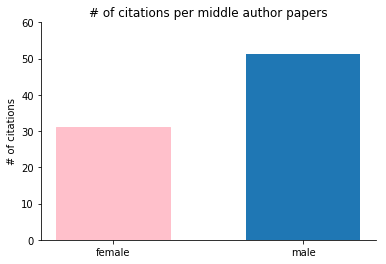

In [11]:
# number of citations per first author paper

mpl.rcParams['axes.spines.left'] = True
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.bottom'] = True

averages = ('female', 'male')
height = [female_citations_other_avg, male_citations_other_avg]
y_pos = np.arange(len(averages))

barlist = plt.bar(y_pos, height, align='center', alpha=1.0, width=0.6)
barlist[0].set_color('pink')
plt.ylim([0,60])
plt.xticks(y_pos, averages)
plt.ylabel('# of citations')
plt.title('# of citations per middle author papers')

# plt.savefig("../figures/middle-author-citations.pdf", bbox_inches='tight')

Text(0.5, 1.0, 'Field-weighted citation impact score \n per first or last author papers')

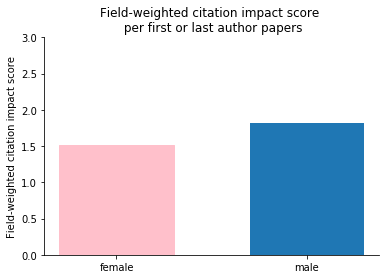

In [13]:
# impact factor per first author paper 

mpl.rcParams['axes.spines.left'] = True
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.bottom'] = True

impact = ('female', 'male')
height = [female_impact_avg, male_impact_avg]
y_pos = np.arange(len(averages))

barlist = plt.bar(y_pos, height, align='center', alpha=1.0, width=0.6)
barlist[0].set_color('pink')
plt.ylim([0,3])
plt.xticks(y_pos, impact)
plt.ylabel('Field-weighted citation impact score')
plt.title('Field-weighted citation impact score \n per first or last author papers')

# plt.savefig("../figures/first-author-impact.pdf", bbox_inches='tight')

Text(0.5, 1.0, 'Field-weighted citation impact score \n per middle author papers')

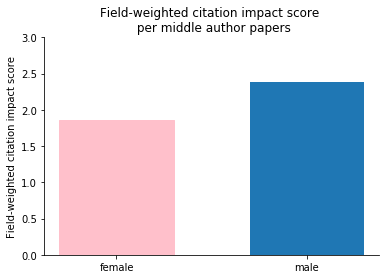

In [14]:
# impact factor per first author paper 

mpl.rcParams['axes.spines.left'] = True
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.bottom'] = True

impact = ('female', 'male')
height = [female_impact_other_avg, male_impact_other_avg]
y_pos = np.arange(len(averages))

barlist = plt.bar(y_pos, height, align='center', alpha=1.0, width=0.6)
barlist[0].set_color('pink')
plt.ylim([0,3])
plt.xticks(y_pos, impact)
plt.ylabel('Field-weighted citation impact score')
plt.title('Field-weighted citation impact score \n per middle author papers')

# plt.savefig("../figures/middle-author-impact.pdf", bbox_inches='tight')